In [1]:
import pandas as pd
import re
import datetime
import seaborn as sns
import sqlite3
import os
import numpy as np
import nbformat
import matplotlib.pyplot as plt
import plotly.tools as tools
import plotly.figure_factory as ff
import plotly.express as px
import ast
import json

In [2]:
df_games = pd.read_csv(r'f:\LPI lessons\Data science\project\pop2\backloggd_games.csv', encoding='latin1')
df_games

,Unnamed: 0,Title,Release_Date,Developers,Summary,Platforms,Genres,Rating,Plays,Playing,Backlogs,Wishlist,Lists,Reviews
0,0,Elden Ring,"Feb 25, 2022","['FromSoftware', 'Bandai Namco Entertainment']","Elden Ring is a fantasy, action and open world...","['Windows PC', 'PlayStation 4', 'Xbox One', 'P...","['Adventure', 'RPG']",4.5,21K,4.1K,5.6K,5.5K,4.6K,3K
1,1,The Legend of Zelda: Breath of the Wild,"Mar 03, 2017","['Nintendo', 'Nintendo EPD Production Group No...",The Legend of Zelda: Breath of the Wild is the...,"['Wii U', 'Nintendo Switch']","['Adventure', 'Puzzle']",4.4,35K,3.1K,5.6K,3K,5.1K,3K
2,2,Hades,"Dec 07, 2018",['Supergiant Games'],A rogue-lite hack and slash dungeon crawler in...,"['Windows PC', 'Mac', 'PlayStation 4', 'Xbox O...","['Adventure', 'Brawler', 'Indie', 'RPG']",4.3,25K,3.5K,7.3K,4K,3.2K,2.1K
3,3,Hollow Knight,"Feb 24, 2017",['Team Cherry'],A 2D metroidvania with an emphasis on close co...,"['Windows PC', 'Mac', 'Linux', 'Nintendo Switch']","['Adventure', 'Indie', 'Platform']",4.4,25K,2.7K,9.6K,2.6K,3.4K,2.1K
4,4,Undertale,"Sep 15, 2015","['tobyfox', '8-4']","A small child falls into the Underground, wher...","['Windows PC', 'Mac', 'Linux', 'PlayStation 4'...","['Adventure', 'Indie', 'RPG', 'Turn Based Stra...",4.2,32K,728,5.7K,2.1K,3.9K,2.5K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,59995,Dragon Spirits,"Apr 25, 2023","['FHNBHJ', 'indienova']",While constantly working on a video game witho...,['Windows PC'],['RPG'],NaN,2,0,1,5,3,0
59996,59996,Pathfinder: Kingmaker - Definitive Edition,"Aug 18, 2020","['Owlcat Games', 'Deep Silver']",The Definitive Edition will have all of the DL...,"['PlayStation 4', 'Xbox One']","['RPG', 'Tactical']",3.7,9,0,19,1,7,1
59997,59997,Sainth,"Apr 11, 2008",['Neo Kuriyo'],"Years after the events of ""Wraith"", a young gi...",['Windows PC'],[],NaN,1,0,0,2,0,0
59998,59998,Dragon Spirits,"Apr 25, 2023","['FHNBHJ', 'indienova']",While constantly working on a video game witho...,['Windows PC'],['RPG'],NaN,2,0,1,5,3,0


Data Cleaning

In [4]:
df_games.drop(columns=['Unnamed: 0'],axis=1,inplace=True)

In [4]:
df_games.isna().sum()

Title               0
Release_Date        0
Developers          0
Summary          4954
Platforms           0
Genres              0
Rating          34595
Plays               0
Playing             0
Backlogs            0
Wishlist            0
Lists               0
Reviews             0
dtype: int64

In [5]:
df_games_cleaned=df_games.fillna('unknown')
df_games_cleaned.isna().sum()

Title           0
Release_Date    0
Developers      0
Summary         0
Platforms       0
Genres          0
Rating          0
Plays           0
Playing         0
Backlogs        0
Wishlist        0
Lists           0
Reviews         0
dtype: int64

In [27]:
df_games_cleaned.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
59995    False
59996    False
59997     True
59998     True
59999     True
Length: 60000, dtype: bool

In [6]:
df_games_cleaned.drop_duplicates(inplace=True)
df_games_cleaned

,Title,Release_Date,Developers,Summary,Platforms,Genres,Rating,Plays,Playing,Backlogs,Wishlist,Lists,Reviews
0,Elden Ring,"Feb 25, 2022","['FromSoftware', 'Bandai Namco Entertainment']","Elden Ring is a fantasy, action and open world...","['Windows PC', 'PlayStation 4', 'Xbox One', 'P...","['Adventure', 'RPG']",4.5,21K,4.1K,5.6K,5.5K,4.6K,3K
1,The Legend of Zelda: Breath of the Wild,"Mar 03, 2017","['Nintendo', 'Nintendo EPD Production Group No...",The Legend of Zelda: Breath of the Wild is the...,"['Wii U', 'Nintendo Switch']","['Adventure', 'Puzzle']",4.4,35K,3.1K,5.6K,3K,5.1K,3K
2,Hades,"Dec 07, 2018",['Supergiant Games'],A rogue-lite hack and slash dungeon crawler in...,"['Windows PC', 'Mac', 'PlayStation 4', 'Xbox O...","['Adventure', 'Brawler', 'Indie', 'RPG']",4.3,25K,3.5K,7.3K,4K,3.2K,2.1K
3,Hollow Knight,"Feb 24, 2017",['Team Cherry'],A 2D metroidvania with an emphasis on close co...,"['Windows PC', 'Mac', 'Linux', 'Nintendo Switch']","['Adventure', 'Indie', 'Platform']",4.4,25K,2.7K,9.6K,2.6K,3.4K,2.1K
4,Undertale,"Sep 15, 2015","['tobyfox', '8-4']","A small child falls into the Underground, wher...","['Windows PC', 'Mac', 'Linux', 'PlayStation 4'...","['Adventure', 'Indie', 'RPG', 'Turn Based Stra...",4.2,32K,728,5.7K,2.1K,3.9K,2.5K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
59992,Trace 2,TBD,[],unknown,[],[],unknown,0,0,0,0,0,0
59993,No Country for Old Men,TBD,[],This is a game combines SIM and SRPG. Please l...,[],"['Indie', 'RPG', 'Simulator', 'Strategy']",unknown,0,0,0,0,0,0
59994,Sainth,"Apr 11, 2008",['Neo Kuriyo'],"Years after the events of ""Wraith"", a young gi...",['Windows PC'],[],unknown,1,0,0,2,0,0
59995,Dragon Spirits,"Apr 25, 2023","['FHNBHJ', 'indienova']",While constantly working on a video game witho...,['Windows PC'],['RPG'],unknown,2,0,1,5,3,0


In [7]:
df_games_cleaned['Release_Date'] = pd.to_datetime(df_games_cleaned['Release_Date'], errors='coerce')
df_games_cleaned.dropna(subset=['Release_Date'], inplace=True)
df_games_cleaned = df_games_cleaned[df_games_cleaned['Release_Date'].between('1980-01-01','2022-12-31')]
df_games_cleaned['Release_Date'] = df_games_cleaned['Release_Date'].dt.year
df_games_cleaned

,Title,Release_Date,Developers,Summary,Platforms,Genres,Rating,Plays,Playing,Backlogs,Wishlist,Lists,Reviews
0,Elden Ring,2022,"['FromSoftware', 'Bandai Namco Entertainment']","Elden Ring is a fantasy, action and open world...","['Windows PC', 'PlayStation 4', 'Xbox One', 'P...","['Adventure', 'RPG']",4.5,21K,4.1K,5.6K,5.5K,4.6K,3K
1,The Legend of Zelda: Breath of the Wild,2017,"['Nintendo', 'Nintendo EPD Production Group No...",The Legend of Zelda: Breath of the Wild is the...,"['Wii U', 'Nintendo Switch']","['Adventure', 'Puzzle']",4.4,35K,3.1K,5.6K,3K,5.1K,3K
2,Hades,2018,['Supergiant Games'],A rogue-lite hack and slash dungeon crawler in...,"['Windows PC', 'Mac', 'PlayStation 4', 'Xbox O...","['Adventure', 'Brawler', 'Indie', 'RPG']",4.3,25K,3.5K,7.3K,4K,3.2K,2.1K
3,Hollow Knight,2017,['Team Cherry'],A 2D metroidvania with an emphasis on close co...,"['Windows PC', 'Mac', 'Linux', 'Nintendo Switch']","['Adventure', 'Indie', 'Platform']",4.4,25K,2.7K,9.6K,2.6K,3.4K,2.1K
4,Undertale,2015,"['tobyfox', '8-4']","A small child falls into the Underground, wher...","['Windows PC', 'Mac', 'Linux', 'PlayStation 4'...","['Adventure', 'Indie', 'RPG', 'Turn Based Stra...",4.2,32K,728,5.7K,2.1K,3.9K,2.5K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
59986,Just Snowboarding,2017,['Rrndrln Games'],Just Snowboarding is a highly authentic snowbo...,['iOS'],"['Simulator', 'Sport']",unknown,0,0,0,0,0,0
59987,Border closure,2018,[],"This is an action role-playing game, you need ...",['Windows PC'],"['Indie', 'RPG']",unknown,0,0,0,1,0,0
59991,å°ºå­åæ©¡ç®,2018,[],Safety and stability in Britain are especially...,['Windows PC'],"['Indie', 'Simulator']",unknown,0,0,0,0,0,0
59994,Sainth,2008,['Neo Kuriyo'],"Years after the events of ""Wraith"", a young gi...",['Windows PC'],[],unknown,1,0,0,2,0,0


Data Analysis

In [42]:
# Total games count by year 

year_game_count = df_games_cleaned['Release_Date'].value_counts().reset_index()
year_game_count.columns = ["Release_Date", "game_count"]
year_game_count.head()

,Release_Date,game_count
0,2017,2295
1,2018,2268
2,2021,2203
3,2019,2138
4,2020,2125


Text(0, 0.5, 'game_count')

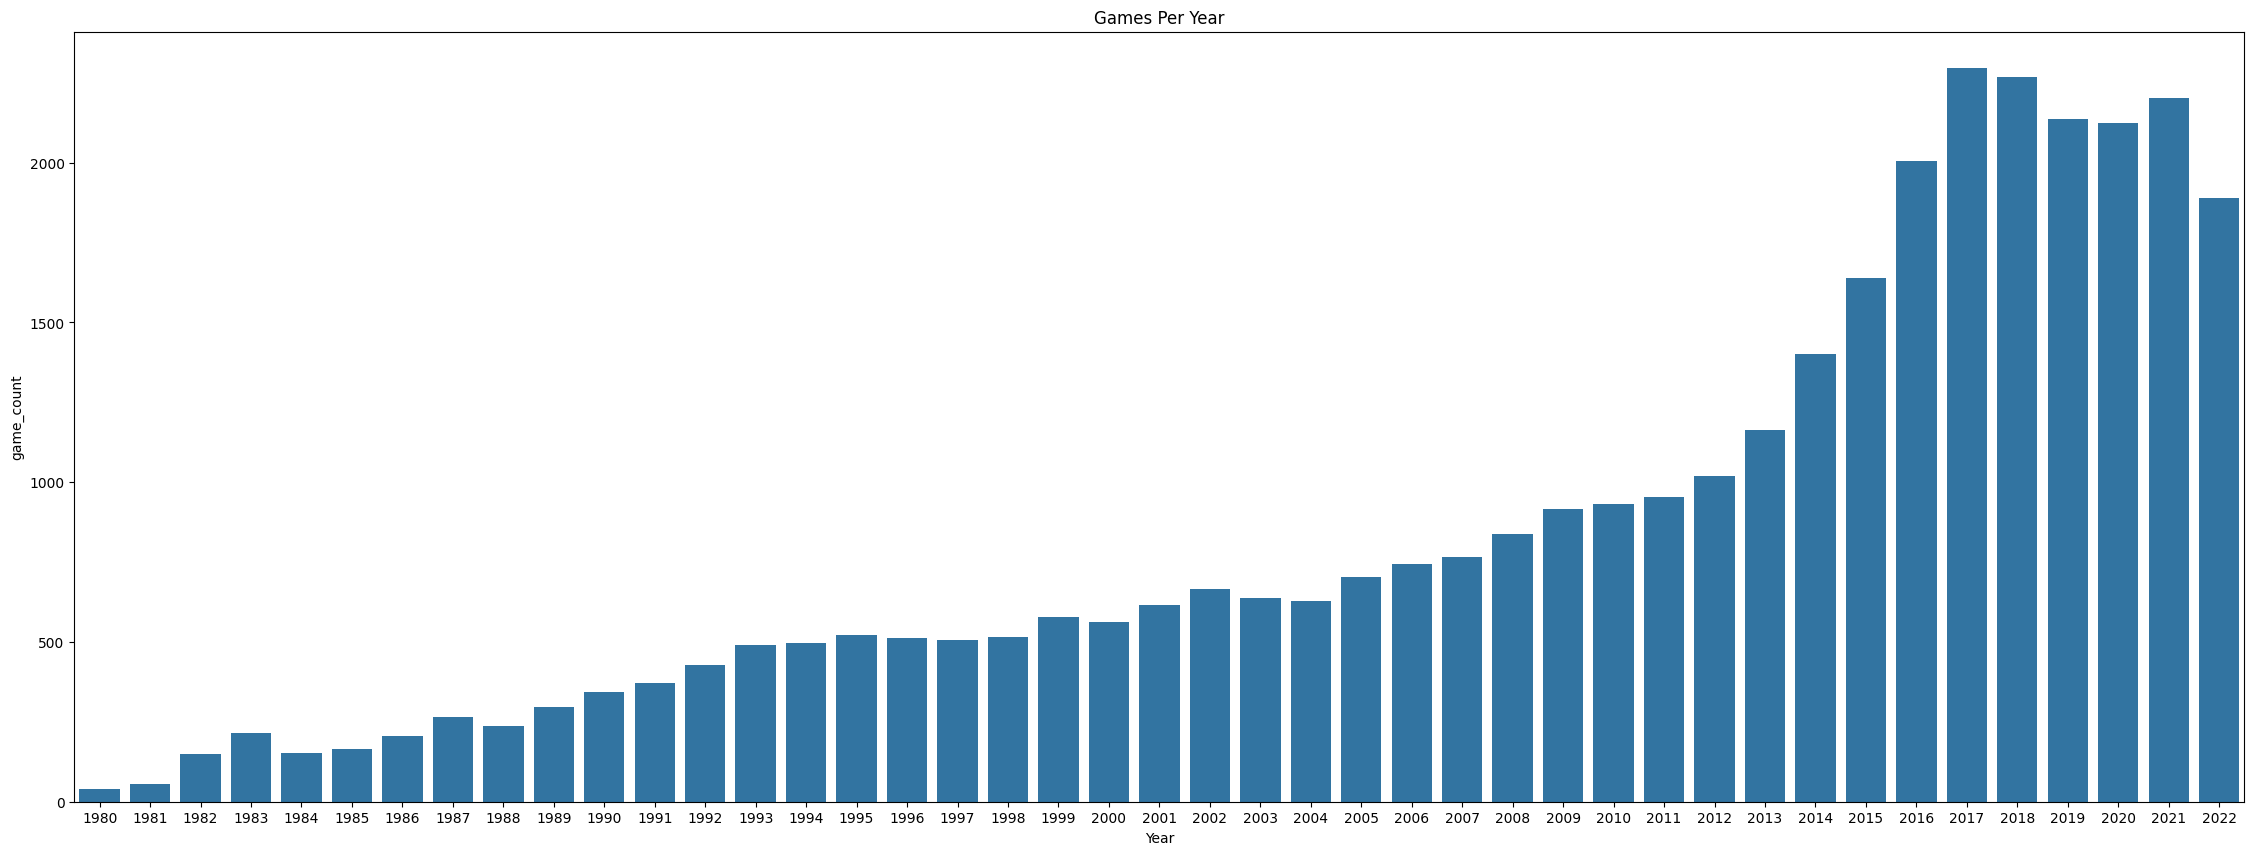

In [8]:
plt.figure(figsize=(28, 10))
sns.barplot(data=year_game_count, x='Release_Date',y='game_count')
plt.title('Games Per Year')
plt.xlabel('Year')
plt.ylabel('game_count')

Platforms Trend

In [23]:

platform_count_year = df_games_cleaned[['Title','Platforms','Release_Date']].copy()
platform_count_year


,Title,Platforms,Release_Date
0,Elden Ring,"['Windows PC', 'PlayStation 4', 'Xbox One', 'P...",2022
1,The Legend of Zelda: Breath of the Wild,"['Wii U', 'Nintendo Switch']",2017
2,Hades,"['Windows PC', 'Mac', 'PlayStation 4', 'Xbox O...",2018
3,Hollow Knight,"['Windows PC', 'Mac', 'Linux', 'Nintendo Switch']",2017
4,Undertale,"['Windows PC', 'Mac', 'Linux', 'PlayStation 4'...",2015
...,...,...,...
59986,Just Snowboarding,['iOS'],2017
59987,Border closure,['Windows PC'],2018
59991,å°ºå­åæ©¡ç®,['Windows PC'],2018
59994,Sainth,['Windows PC'],2008


In [15]:
platform_count_year['Platforms'].dtype

dtype('O')

In [10]:
sum(platform_count_year['Platforms']=='[]')

5

In [11]:
sum(platform_count_year['Platforms'] == 'unknown')

0

In [24]:
platform_count_year = platform_count_year[platform_count_year['Platforms']!='[]']
platform_count_year

,Title,Platforms,Release_Date
0,Elden Ring,"['Windows PC', 'PlayStation 4', 'Xbox One', 'P...",2022
1,The Legend of Zelda: Breath of the Wild,"['Wii U', 'Nintendo Switch']",2017
2,Hades,"['Windows PC', 'Mac', 'PlayStation 4', 'Xbox O...",2018
3,Hollow Knight,"['Windows PC', 'Mac', 'Linux', 'Nintendo Switch']",2017
4,Undertale,"['Windows PC', 'Mac', 'Linux', 'PlayStation 4'...",2015
...,...,...,...
59986,Just Snowboarding,['iOS'],2017
59987,Border closure,['Windows PC'],2018
59991,å°ºå­åæ©¡ç®,['Windows PC'],2018
59994,Sainth,['Windows PC'],2008


In [25]:
platform_count_year['Platforms'] = platform_count_year['Platforms'].str.replace(r"[\[\]']", '', regex=True)
platform_count_year['Platforms'] = platform_count_year['Platforms'].str.split(', ')
platform_count_year

,Title,Platforms,Release_Date
0,Elden Ring,"[Windows PC, PlayStation 4, Xbox One, PlayStat...",2022
1,The Legend of Zelda: Breath of the Wild,"[Wii U, Nintendo Switch]",2017
2,Hades,"[Windows PC, Mac, PlayStation 4, Xbox One, Pla...",2018
3,Hollow Knight,"[Windows PC, Mac, Linux, Nintendo Switch]",2017
4,Undertale,"[Windows PC, Mac, Linux, PlayStation 4, Xbox O...",2015
...,...,...,...
59986,Just Snowboarding,[iOS],2017
59987,Border closure,[Windows PC],2018
59991,å°ºå­åæ©¡ç®,[Windows PC],2018
59994,Sainth,[Windows PC],2008


In [26]:
platform_count_year = platform_count_year.explode('Platforms')
platform_count_year

,Title,Platforms,Release_Date
0,Elden Ring,Windows PC,2022
0,Elden Ring,PlayStation 4,2022
0,Elden Ring,Xbox One,2022
0,Elden Ring,PlayStation 5,2022
0,Elden Ring,Xbox Series,2022
...,...,...,...
59987,Border closure,Windows PC,2018
59991,å°ºå­åæ©¡ç®,Windows PC,2018
59994,Sainth,Windows PC,2008
59996,Pathfinder: Kingmaker - Definitive Edition,PlayStation 4,2020


In [14]:
sum(platform_count_year['Platforms'] == 'Windows PC')

19626

In [27]:
plateform_final_counts = platform_count_year.groupby(['Release_Date', 'Platforms'])['Title'].count().reset_index()
plateform_final_counts

,Release_Date,Platforms,Title
0,1980,1292 Advanced Programmable Video System,1
1,1980,Acorn Electron,1
2,1980,Amiga,1
3,1980,Amstrad CPC,1
4,1980,Amstrad PCW,1
...,...,...,...
2137,2022,Windows Phone,2
2138,2022,Xbox One,315
2139,2022,Xbox Series,267
2140,2022,ZX Spectrum,1


In [427]:
sum(plateform_final_counts['Platforms'] == 'Xbox Series')

13

In [19]:
p_l_fig = px.line(plateform_final_counts, x="Release_Date", y="Title", color="Platforms", color_discrete_sequence=px.colors.qualitative.D3
)
p_l_fig.update_layout(title="Plateforms And Release Year", xaxis_title="Year", yaxis_title="Game Count"
)
p_l_fig.show()

In [66]:
p_afig = px.area(plateform_final_counts, x="Release_Date", y="Title", color="Platforms",
              color_discrete_sequence=px.colors.qualitative.D3)

p_afig.update_layout(title="Games count by Platform per Year", xaxis_title="Year", yaxis_title="Games count")
p_afig.show()

In [28]:
platform_filters = ['Windows PC', 'Mac', 'PlayStation 4', 'Nintendo Switch', 
                 'Xbox One', 'PlayStation 5	', 'Xbox Series', 'Android','iOS','Web browser']

platform_area = plateform_final_counts[plateform_final_counts['Platforms'].isin(platform_filters)]
platform_area

,Release_Date,Platforms,Title
26,1980,Mac,1
39,1980,Windows PC,1
68,1981,Mac,1
82,1981,Web browser,2
84,1981,Windows PC,1
...,...,...,...
2132,2022,Web browser,85
2136,2022,Windows PC,1435
2138,2022,Xbox One,315
2139,2022,Xbox Series,267


In [425]:
platform_area['Release_Date'] = pd.to_numeric(platform_area['Release_Date'], errors='coerce')  

fig = px.area(platform_area, x="Release_Date", y="Title", color="Platforms",
              color_discrete_sequence=px.colors.qualitative.D3)

fig.update_layout(title="Games count by Platform per Year", xaxis_title="Year", yaxis_title="Games count")
fig.show()

In [385]:
p_l_fig2 = px.line(platform_area, x="Release_Date", y="Title", color="Platforms", color_discrete_sequence=px.colors.qualitative.D3
)
p_l_fig2.update_layout(title="Main Plateforms And Release Year", xaxis_title="Year", yaxis_title="Game Count"
)
p_l_fig2.show()

In [29]:
pc_count = plateform_final_counts.loc[plateform_final_counts["Platforms"] == 'Windows PC']
pc_count.rename(columns={'Title':'PC_count'}, inplace=True)
pc_count.tail()

,Release_Date,Platforms,PC_count
1954,2018,Windows PC,1779
1997,2019,Windows PC,1682
2045,2020,Windows PC,1695
2092,2021,Windows PC,1724
2136,2022,Windows PC,1435


In [30]:
ns_count = plateform_final_counts.loc[plateform_final_counts["Platforms"] == 'Nintendo Switch']
ns_count.rename(columns={'Title':'NS_count'}, inplace=True)
ns_count.tail()

,Release_Date,Platforms,NS_count
1929,2018,Nintendo Switch,595
1977,2019,Nintendo Switch,603
2024,2020,Nintendo Switch,566
2074,2021,Nintendo Switch,573
2116,2022,Nintendo Switch,450


In [31]:
ps4_count = plateform_final_counts.loc[plateform_final_counts["Platforms"] == 'PlayStation 4']
ps4_count.rename(columns={'Title':'PS 4_count'}, inplace=True)
ps4_count.tail()

,Release_Date,Platforms,PS 4_count
1939,2018,PlayStation 4,583
1983,2019,PlayStation 4,538
2030,2020,PlayStation 4,485
2080,2021,PlayStation 4,466
2123,2022,PlayStation 4,365


In [32]:
mac_count = plateform_final_counts.loc[plateform_final_counts["Platforms"] == 'Mac']
mac_count.rename(columns={'Title':'Mac_count'}, inplace=True)
mac_count.tail()

,Release_Date,Platforms,Mac_count
1922,2018,Mac,533
1971,2019,Mac,463
2018,2020,Mac,412
2067,2021,Mac,338
2111,2022,Mac,245


Genres Trend

In [33]:


genre_count_year = df_games_cleaned[['Title','Genres','Release_Date']].copy()
genre_count_year

,Title,Genres,Release_Date
0,Elden Ring,"['Adventure', 'RPG']",2022
1,The Legend of Zelda: Breath of the Wild,"['Adventure', 'Puzzle']",2017
2,Hades,"['Adventure', 'Brawler', 'Indie', 'RPG']",2018
3,Hollow Knight,"['Adventure', 'Indie', 'Platform']",2017
4,Undertale,"['Adventure', 'Indie', 'RPG', 'Turn Based Stra...",2015
...,...,...,...
59986,Just Snowboarding,"['Simulator', 'Sport']",2017
59987,Border closure,"['Indie', 'RPG']",2018
59991,å°ºå­åæ©¡ç®,"['Indie', 'Simulator']",2018
59994,Sainth,[],2008


In [38]:
sum(genre_count_year['Genres']=='[]')

2357

In [34]:
genre_count_year = genre_count_year[genre_count_year['Genres'] != '[]']
genre_count_year

,Title,Genres,Release_Date
0,Elden Ring,"['Adventure', 'RPG']",2022
1,The Legend of Zelda: Breath of the Wild,"['Adventure', 'Puzzle']",2017
2,Hades,"['Adventure', 'Brawler', 'Indie', 'RPG']",2018
3,Hollow Knight,"['Adventure', 'Indie', 'Platform']",2017
4,Undertale,"['Adventure', 'Indie', 'RPG', 'Turn Based Stra...",2015
...,...,...,...
59985,Japanese Rail Sim 3D Monorail Trip to Okinawa,['Simulator'],2016
59986,Just Snowboarding,"['Simulator', 'Sport']",2017
59987,Border closure,"['Indie', 'RPG']",2018
59991,å°ºå­åæ©¡ç®,"['Indie', 'Simulator']",2018


In [35]:
sum(genre_count_year['Genres'] == 'unknown')

0

In [36]:
genre_count_year['Genres'] = genre_count_year['Genres'].str.replace(r"[\[\]']", '', regex=True)
genre_count_year['Genres'] = genre_count_year['Genres'].str.split(', ')

In [12]:
genre_count_year

,Title,Genres,Release_Date
0,Elden Ring,"[Adventure, RPG]",2022
1,The Legend of Zelda: Breath of the Wild,"[Adventure, Puzzle]",2017
2,Hades,"[Adventure, Brawler, Indie, RPG]",2018
3,Hollow Knight,"[Adventure, Indie, Platform]",2017
4,Undertale,"[Adventure, Indie, RPG, Turn Based Strategy]",2015
...,...,...,...
59985,Japanese Rail Sim 3D Monorail Trip to Okinawa,[Simulator],2016
59986,Just Snowboarding,"[Simulator, Sport]",2017
59987,Border closure,"[Indie, RPG]",2018
59991,å°ºå­åæ©¡ç®,"[Indie, Simulator]",2018


In [37]:
genre_count_year = genre_count_year.explode('Genres')
genre_final_counts = genre_count_year.groupby(['Release_Date', 'Genres'])['Title'].count().reset_index()
genre_final_counts

,Release_Date,Genres,Title
0,1980,Adventure,5
1,1980,Arcade,13
2,1980,Card & Board Game,1
3,1980,Pinball,2
4,1980,Puzzle,3
...,...,...,...
909,2022,Sport,67
910,2022,Strategy,261
911,2022,Tactical,43
912,2022,Turn Based Strategy,52


In [38]:
genre_filters = ['Adventure', 'Indie', 'RPG', 'Strategy', 
                 'Simulator', 'Shooter', 'Puzzle', 'Platform', 
                 'Arcade', 'Visual Novel']

genre_area = genre_final_counts[genre_final_counts['Genres'].isin(genre_filters)]
genre_area

,Release_Date,Genres,Title
0,1980,Adventure,5
1,1980,Arcade,13
4,1980,Puzzle,3
5,1980,RPG,3
7,1980,Shooter,12
...,...,...,...
904,2022,RPG,338
907,2022,Shooter,209
908,2022,Simulator,314
910,2022,Strategy,261


In [15]:
g_l_fig2 = px.line(genre_area, x="Release_Date", y="Title", color="Genres", color_discrete_sequence=px.colors.qualitative.D3
)
g_l_fig2.update_layout(title="Main Genres And Release Year", xaxis_title="Year", yaxis_title="Game Count"
)
g_l_fig2.show()

In [16]:
genre_area['Release_Date'] = pd.to_numeric(genre_area['Release_Date'], errors='coerce')  

fig = px.area(genre_area, x="Release_Date", y="Title", color="Genres",
              color_discrete_sequence=px.colors.qualitative.D3)

fig.update_layout(title="Games count by Genre per Year", xaxis_title="Year", yaxis_title="Games count")
fig.show()

In [17]:
g_l_fig = px.line(genre_final_counts, x="Release_Date", y="Title", color="Genres", color_discrete_sequence=px.colors.sequential.Rainbow_r
)
g_l_fig.update_layout(title="Genres And Release Year", xaxis_title="Year", yaxis_title="Game Count"
)
g_l_fig.show()

In [19]:
g_afig = px.area(genre_final_counts, x="Release_Date", y="Title", color="Genres",
              color_discrete_sequence=px.colors.qualitative.D3)

g_afig.update_layout(title="Games count by Genre per Year", xaxis_title="Year", yaxis_title="Games count")
g_afig.show()

In [39]:
ad_count = genre_final_counts.loc[genre_final_counts["Genres"] == 'Adventure']
ad_count.rename(columns={'Title':'Adventure_count'}, inplace=True)
ad_count.tail()

,Release_Date,Genres,Adventure_count
800,2018,Adventure,952
823,2019,Adventure,937
846,2020,Adventure,919
868,2021,Adventure,992
891,2022,Adventure,820


In [40]:
in_count = genre_final_counts.loc[genre_final_counts["Genres"] == 'Indie']
in_count.rename(columns={'Title':'Indie_count'}, inplace=True)
in_count.tail()

,Release_Date,Genres,Indie_count
805,2018,Indie,1223
828,2019,Indie,1111
851,2020,Indie,1180
873,2021,Indie,1153
896,2022,Indie,969


Boxplot

In [43]:
merged_box = pd.merge(pc_count, ad_count, on='Release_Date', how='inner')
merged_box = pd.merge(merged_box, in_count, on='Release_Date', how='inner')
merged_box = pd.merge(merged_box, year_game_count, on='Release_Date', how='inner')
merged_box.tail()

,Release_Date,Platforms,PC_count,Genres_x,Adventure_count,Genres_y,Indie_count,game_count
35,2018,Windows PC,1779,Adventure,952,Indie,1223,2268
36,2019,Windows PC,1682,Adventure,937,Indie,1111,2138
37,2020,Windows PC,1695,Adventure,919,Indie,1180,2125
38,2021,Windows PC,1724,Adventure,992,Indie,1153,2203
39,2022,Windows PC,1435,Adventure,820,Indie,969,1888


In [44]:
merged_box['pc_proprtion'] = merged_box['PC_count'] / merged_box['game_count']
merged_box['ad_proprtion'] = merged_box['Adventure_count'] / merged_box['game_count']
merged_box['in_proprtion'] = merged_box['Indie_count'] / merged_box['game_count']
merged_box.tail()

,Release_Date,Platforms,PC_count,Genres_x,Adventure_count,Genres_y,Indie_count,game_count,pc_proprtion,ad_proprtion,in_proprtion
35,2018,Windows PC,1779,Adventure,952,Indie,1223,2268,0.784392,0.419753,0.539242
36,2019,Windows PC,1682,Adventure,937,Indie,1111,2138,0.786717,0.438260,0.519645
37,2020,Windows PC,1695,Adventure,919,Indie,1180,2125,0.797647,0.432471,0.555294
38,2021,Windows PC,1724,Adventure,992,Indie,1153,2203,0.782569,0.450295,0.523377
39,2022,Windows PC,1435,Adventure,820,Indie,969,1888,0.760064,0.434322,0.513242


In [45]:
merged_box['Release_Date'] = pd.to_numeric(merged_box['Release_Date'], errors='coerce')
merged_box_p = merged_box[merged_box['Release_Date'].between(1989,2022)]
merged_box_p.head()

,Release_Date,Platforms,PC_count,Genres_x,Adventure_count,Genres_y,Indie_count,game_count,pc_proprtion,ad_proprtion,in_proprtion
6,1989,Windows PC,23,Adventure,64,Indie,1,297,0.077441,0.215488,0.003367
7,1990,Windows PC,35,Adventure,80,Indie,2,344,0.101744,0.232558,0.005814
8,1991,Windows PC,40,Adventure,72,Indie,2,373,0.107239,0.193029,0.005362
9,1992,Windows PC,48,Adventure,95,Indie,2,427,0.112412,0.222482,0.004684
10,1993,Windows PC,69,Adventure,102,Indie,1,490,0.140816,0.208163,0.002041


In [46]:
merged_box_l = merged_box_p.copy()

In [47]:
merged_box_p['Release_Date'] = pd.cut(merged_box_p['Release_Date'], bins=[1987, 1996, 2010, 2022], labels=['1988-1996', '1997-2010', '2011-2022'])


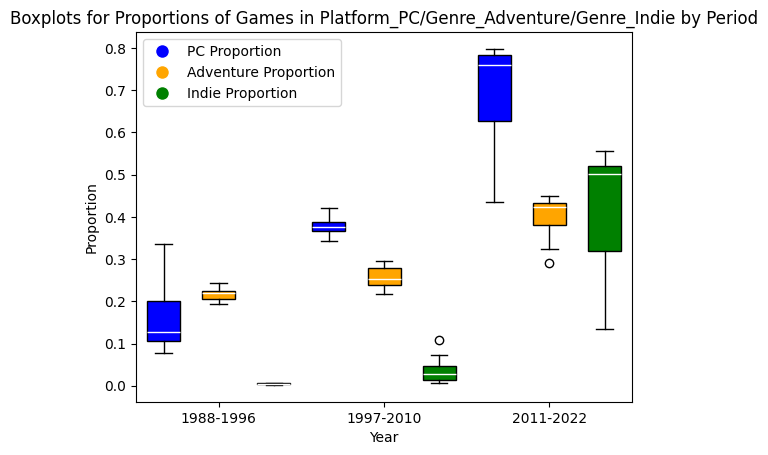

In [397]:
fig, ax = plt.subplots()


color_dict = {'PC Proportion': 'blue', 'Adventure Proportion': 'orange', 'Indie Proportion': 'green'}


for i, year in enumerate(merged_box_p['Release_Date'].unique()):
    subset = merged_box_p[merged_box_p['Release_Date'] == year]
    positions = [i*3 + 1, i*3 + 2, i*3 + 3]
    box = ax.boxplot([subset['pc_proprtion'], subset['ad_proprtion'], subset['in_proprtion']], positions=positions, widths=0.6, showfliers=True, patch_artist=True, medianprops=dict(color='white'))
    
    
    for j, box_type in enumerate(['PC Proportion', 'Adventure Proportion', 'Indie Proportion']):
        color = color_dict[box_type]
        patch = box['boxes'][j]
        patch.set_facecolor(color)


ax.set_xticks([i*3 + 2 for i in range(len(merged_box_p['Release_Date'].unique()))])
ax.set_xticklabels([str(year) for year in merged_box_p['Release_Date'].unique()])


ax.set_xlabel('Year')
ax.set_ylabel('Proportion')
ax.set_title('Boxplots for Proportions of Games in Platform_PC/Genre_Adventure/Genre_Indie by Period')


legend_patches = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10) for color in color_dict.values()]
ax.legend(legend_patches, color_dict.keys())

plt.show()

Line chart

In [277]:
merged_box_l.head()

,Release_Date,Platforms,PC_count,Genres_x,Adventure_count,Genres_y,Indie_count,game_count,pc_proprtion,ad_proprtion,in_proprtion
6,1989,Windows PC,23,Adventure,64,Indie,1,297,0.077441,0.215488,0.003367
7,1990,Windows PC,35,Adventure,80,Indie,2,344,0.101744,0.232558,0.005814
8,1991,Windows PC,40,Adventure,72,Indie,2,373,0.107239,0.193029,0.005362
9,1992,Windows PC,48,Adventure,95,Indie,2,427,0.112412,0.222482,0.004684
10,1993,Windows PC,69,Adventure,102,Indie,1,490,0.140816,0.208163,0.002041


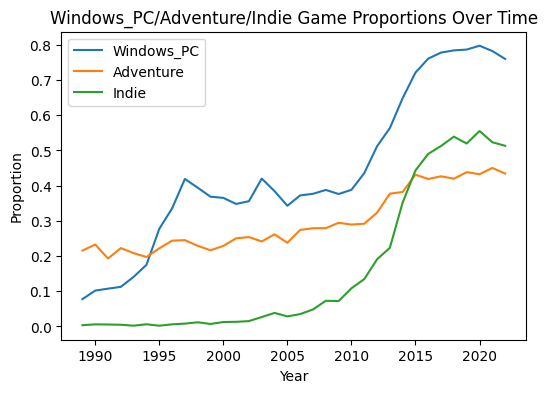

In [396]:
plt.figure(figsize=(6, 4))

plt.plot(merged_box_l['Release_Date'], merged_box_l['pc_proprtion'], label='Windows_PC', marker='')
plt.plot(merged_box_l['Release_Date'], merged_box_l['ad_proprtion'], label='Adventure', marker='')
plt.plot(merged_box_l['Release_Date'], merged_box_l['in_proprtion'], label='Indie', marker='')


plt.legend()
plt.xlabel('Year')
plt.ylabel('Proportion')
plt.title('Windows_PC/Adventure/Indie Game Proportions Over Time')


plt.show()

Normal Distribution Test

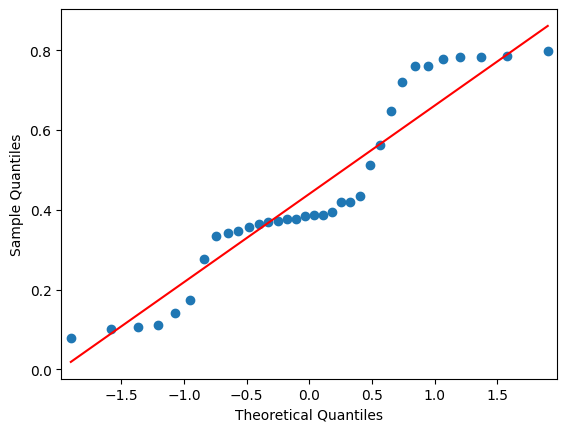

In [375]:
import statsmodels.api as sm
sm.qqplot(merged_box_l['pc_proprtion'], line='s')
plt.show()

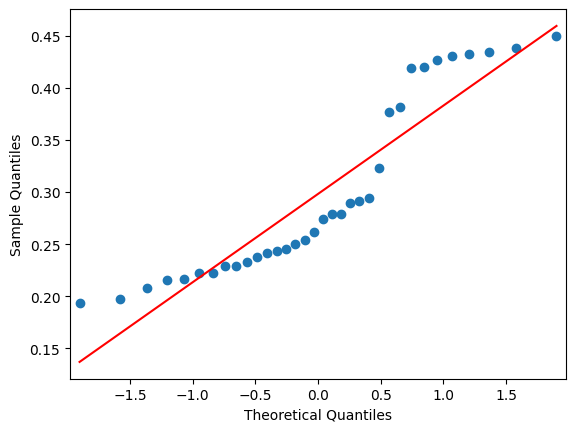

In [376]:
sm.qqplot(merged_box_l['ad_proprtion'], line='s')
plt.show()

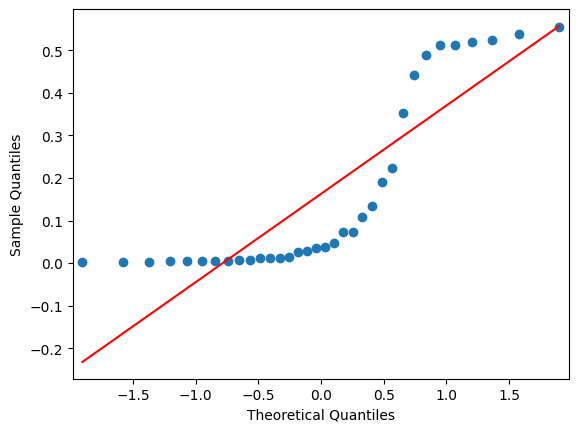

In [377]:
sm.qqplot(merged_box_l['in_proprtion'], line='s')
plt.show()

In [178]:
import statsmodels.formula.api as smf
from scipy import stats
from scipy.stats import mannwhitneyu
from statsmodels.tsa.stattools import grangercausalitytests

Spearman Correlation

In [48]:
sample1 = merged_box_l['pc_proprtion']
sample2 = merged_box_l['in_proprtion']
sample3 = merged_box_l['ad_proprtion']

In [50]:
from scipy.stats import spearmanr

corr, p_value = spearmanr(sample1, sample2)

print(f"Spearman Rank Correlation: {corr}")
print(f"P-value: {p_value}")


alpha = 0.05
if p_value < alpha:
    print("Significant monotonic relationship")
else:
    print("No significant monotonic relationship")

Spearman Rank Correlation: 0.9263559969442322
P-value: 4.0465934374858304e-15
Significant monotonic relationship


In [52]:

corr, p_value = spearmanr(sample1, sample3)

print(f"Spearman Rank Correlation: {corr}")
print(f"P-value: {p_value}")


alpha = 0.05
if p_value < alpha:
    print("Significant monotonic relationship")
else:
    print("No significant monotonic relationship")

Spearman Rank Correlation: 0.893353705118411
P-value: 1.1874417031948278e-12
Significant monotonic relationship


In [53]:
merged_all = pd.merge(merged_box, ns_count, on='Release_Date', how='inner', suffixes=('_merged_box', '_ns_count'))
merged_all = pd.merge(merged_all, ps4_count, on='Release_Date', how='inner', suffixes=('_merged_all', '_ps4_count'))
merged_all = pd.merge(merged_all, mac_count, on='Release_Date', how='inner', suffixes=('_merged_all', '_mac_count'))

merged_all.sample()

,Release_Date,Platforms_merged_box,PC_count,Genres_x,Adventure_count,Genres_y,Indie_count,game_count,pc_proprtion,ad_proprtion,in_proprtion,Platforms_ns_count,NS_count,Platforms_merged_all,PS 4_count,Platforms_mac_count,Mac_count
19,2006,Windows PC,277,Adventure,204,Indie,26,744,0.372312,0.274194,0.034946,Nintendo Switch,7,PlayStation 4,9,Mac,37


In [54]:
merged_all['ns_proprtion'] = merged_all['NS_count'] / merged_all['game_count']
merged_all['PS4_proprtion'] = merged_all['PS 4_count'] / merged_all['game_count']
merged_all['mac_proprtion'] = merged_all['Mac_count'] / merged_all['game_count']
merged_all.tail()

,Release_Date,Platforms_merged_box,PC_count,Genres_x,Adventure_count,Genres_y,Indie_count,game_count,pc_proprtion,ad_proprtion,in_proprtion,Platforms_ns_count,NS_count,Platforms_merged_all,PS 4_count,Platforms_mac_count,Mac_count,ns_proprtion,PS4_proprtion,mac_proprtion
31,2018,Windows PC,1779,Adventure,952,Indie,1223,2268,0.784392,0.419753,0.539242,Nintendo Switch,595,PlayStation 4,583,Mac,533,0.262346,0.257055,0.235009
32,2019,Windows PC,1682,Adventure,937,Indie,1111,2138,0.786717,0.438260,0.519645,Nintendo Switch,603,PlayStation 4,538,Mac,463,0.282039,0.251637,0.216558
33,2020,Windows PC,1695,Adventure,919,Indie,1180,2125,0.797647,0.432471,0.555294,Nintendo Switch,566,PlayStation 4,485,Mac,412,0.266353,0.228235,0.193882
34,2021,Windows PC,1724,Adventure,992,Indie,1153,2203,0.782569,0.450295,0.523377,Nintendo Switch,573,PlayStation 4,466,Mac,338,0.260100,0.211530,0.153427
35,2022,Windows PC,1435,Adventure,820,Indie,969,1888,0.760064,0.434322,0.513242,Nintendo Switch,450,PlayStation 4,365,Mac,245,0.238347,0.193326,0.129767


In [55]:
merged_all_pro = merged_all[['in_proprtion','ad_proprtion','pc_proprtion','ns_proprtion','mac_proprtion','PS4_proprtion']]

In [56]:
sample_in = merged_all['in_proprtion']
sample_pc = merged_all['pc_proprtion']
sample_ns = merged_all['ns_proprtion']
sample_mac = merged_all['mac_proprtion']
sample_ad = merged_all['ad_proprtion']
sample_ps4 = merged_all['PS4_proprtion']

In [57]:
merged_all_2011 = merged_all[merged_all['Release_Date']>=2011]
merged_all_2011.head()

,Release_Date,Platforms_merged_box,PC_count,Genres_x,Adventure_count,Genres_y,Indie_count,game_count,pc_proprtion,ad_proprtion,in_proprtion,Platforms_ns_count,NS_count,Platforms_merged_all,PS 4_count,Platforms_mac_count,Mac_count,ns_proprtion,PS4_proprtion,mac_proprtion
24,2011,Windows PC,415,Adventure,278,Indie,128,953,0.435467,0.291710,0.134313,Nintendo Switch,30,PlayStation 4,28,Mac,122,0.031480,0.029381,0.128017
25,2012,Windows PC,521,Adventure,329,Indie,194,1018,0.511788,0.323183,0.190570,Nintendo Switch,61,PlayStation 4,65,Mac,178,0.059921,0.063851,0.174853
26,2013,Windows PC,656,Adventure,439,Indie,260,1164,0.563574,0.377148,0.223368,Nintendo Switch,77,PlayStation 4,136,Mac,229,0.066151,0.116838,0.196735
27,2014,Windows PC,908,Adventure,535,Indie,493,1400,0.648571,0.382143,0.352143,Nintendo Switch,117,PlayStation 4,264,Mac,349,0.083571,0.188571,0.249286
28,2015,Windows PC,1183,Adventure,707,Indie,727,1640,0.721341,0.431098,0.443293,Nintendo Switch,174,PlayStation 4,395,Mac,520,0.106098,0.240854,0.317073


In [58]:
sample_in_2011 = merged_all_2011['in_proprtion']
sample_pc_2011 = merged_all_2011['pc_proprtion']
sample_ns_2011 = merged_all_2011['ns_proprtion']
sample_mac_2011 = merged_all_2011['mac_proprtion']
sample_ad_2011 = merged_all_2011['ad_proprtion']
sample_ps4_2011 =merged_all_2011['PS4_proprtion']

In [59]:
corr, p_value = spearmanr(sample_ad_2011, sample_pc_2011)

print(f"Spearman Rank Correlation: {corr}")
print(f"P-value: {p_value}")


alpha = 0.05
if p_value < alpha:
    print("Significant monotonic relationship")
else:
    print("No significant monotonic relationship")

Spearman Rank Correlation: 0.7762237762237763
P-value: 0.0029928636801859797
Significant monotonic relationship


In [60]:
corr, p_value = spearmanr(sample_ad_2011, sample_ns_2011)

print(f"Spearman Rank Correlation: {corr}")
print(f"P-value: {p_value}")


alpha = 0.05
if p_value < alpha:
    print("Significant monotonic relationship")
else:
    print("No significant monotonic relationship")

Spearman Rank Correlation: 0.8461538461538463
P-value: 0.000521133700481005
Significant monotonic relationship


In [61]:
corr, p_value = spearmanr(sample_ad_2011, sample_ps4_2011)

print(f"Spearman Rank Correlation: {corr}")
print(f"P-value: {p_value}")


alpha = 0.05
if p_value < alpha:
    print("Significant monotonic relationship")
else:
    print("No significant monotonic relationship")

Spearman Rank Correlation: 0.5524475524475525
P-value: 0.06251148327961512
No significant monotonic relationship


In [62]:
corr, p_value = spearmanr(sample_in_2011, sample_pc_2011)

print(f"Spearman Rank Correlation: {corr}")
print(f"P-value: {p_value}")


alpha = 0.05
if p_value < alpha:
    print("Significant monotonic relationship")
else:
    print("No significant monotonic relationship")

Spearman Rank Correlation: 0.9580419580419581
P-value: 9.543581826838402e-07
Significant monotonic relationship


In [63]:

corr, p_value = spearmanr(sample_in_2011, sample_ns_2011)

print(f"Spearman Rank Correlation: {corr}")
print(f"P-value: {p_value}")


alpha = 0.05
if p_value < alpha:
    print("Significant monotonic relationship")
else:
    print("No significant monotonic relationship")

Spearman Rank Correlation: 0.9580419580419581
P-value: 9.543581826838402e-07
Significant monotonic relationship


In [64]:
corr, p_value = spearmanr(sample_in_2011, sample_mac_2011)

print(f"Spearman Rank Correlation: {corr}")
print(f"P-value: {p_value}")


alpha = 0.05
if p_value < alpha:
    print("Significant monotonic relationship")
else:
    print("No significant monotonic relationship")

Spearman Rank Correlation: 0.06993006993006995
P-value: 0.8290236405313092
No significant monotonic relationship


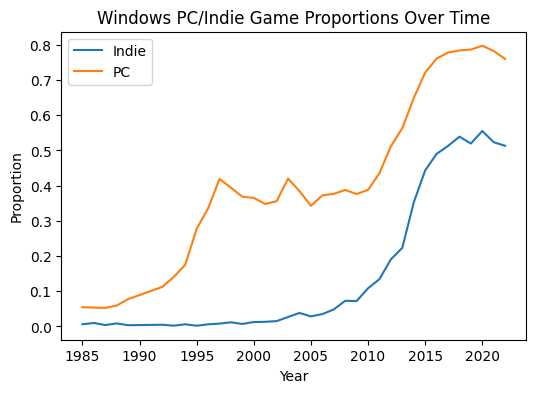

In [398]:
plt.figure(figsize=(6, 4))

plt.plot(merged_all['Release_Date'], merged_all['in_proprtion'], label='Indie', marker='')
plt.plot(merged_all['Release_Date'], merged_all['pc_proprtion'], label='PC', marker='')



plt.legend()
plt.xlabel('Year')
plt.ylabel('Proportion')
plt.title('Windows PC/Indie Game Proportions Over Time')

plt.show()

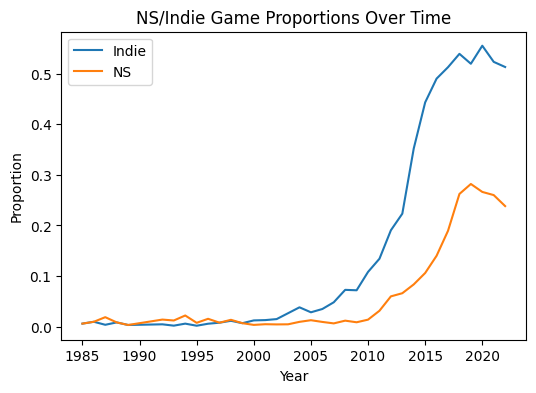

In [400]:
plt.figure(figsize=(6, 4))

plt.plot(merged_all['Release_Date'], merged_all['in_proprtion'], label='Indie', marker='')

plt.plot(merged_all['Release_Date'], merged_all['ns_proprtion'], label='NS', marker='')



plt.legend()
plt.xlabel('Year')
plt.ylabel('Proportion')
plt.title('NS/Indie Game Proportions Over Time')


plt.show()

In [65]:

corr, p_value = spearmanr(sample_in, sample_ns)

print(f"Spearman Rank Correlation: {corr}")
print(f"P-value: {p_value}")


alpha = 0.05
if p_value < alpha:
    print("Significant monotonic relationship")
else:
    print("No significant monotonic relationship")

Spearman Rank Correlation: 0.6741312741312742
P-value: 6.560260860080989e-06
Significant monotonic relationship


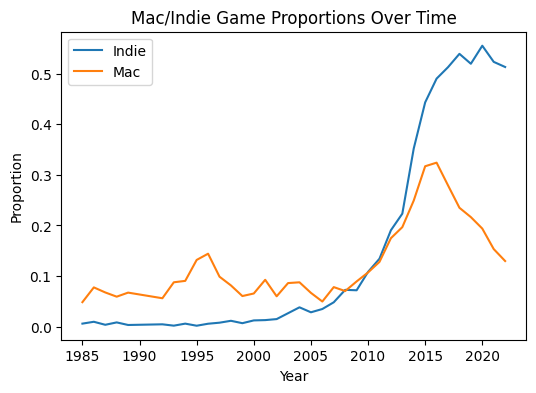

In [401]:
plt.figure(figsize=(6, 4))

plt.plot(merged_all['Release_Date'], merged_all['in_proprtion'], label='Indie', marker='')

plt.plot(merged_all['Release_Date'], merged_all['mac_proprtion'], label='Mac', marker='')


plt.legend()
plt.xlabel('Year')
plt.ylabel('Proportion')
plt.title('Mac/Indie Game Proportions Over Time')

plt.show()

In [66]:

corr, p_value = spearmanr(sample_in, sample_mac)

print(f"Spearman Rank Correlation: {corr}")
print(f"P-value: {p_value}")


alpha = 0.05
if p_value < alpha:
    print("Significant monotonic relationship")
else:
    print("No significant monotonic relationship")

Spearman Rank Correlation: 0.6422136422136422
P-value: 2.4177890056593202e-05
Significant monotonic relationship


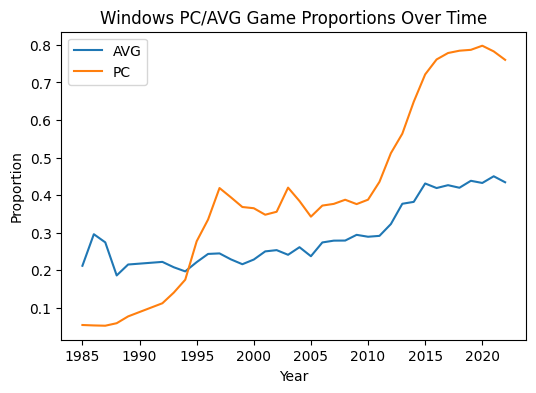

In [399]:
plt.figure(figsize=(6, 4))

plt.plot(merged_all['Release_Date'], merged_all['ad_proprtion'], label='AVG', marker='')
plt.plot(merged_all['Release_Date'], merged_all['pc_proprtion'], label='PC', marker='')



plt.legend()
plt.xlabel('Year')
plt.ylabel('Proportion')
plt.title('Windows PC/AVG Game Proportions Over Time')


plt.show()

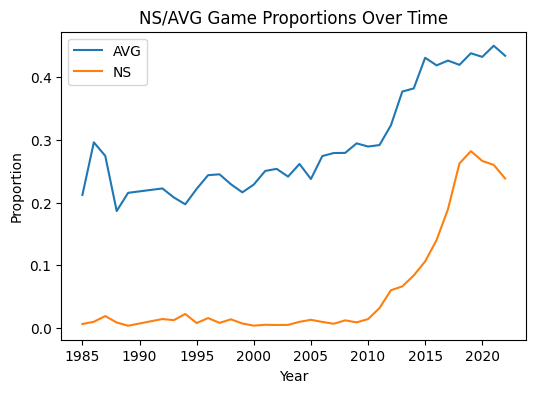

In [402]:
plt.figure(figsize=(6, 4))

plt.plot(merged_all['Release_Date'], merged_all['ad_proprtion'], label='AVG', marker='')
plt.plot(merged_all['Release_Date'], merged_all['ns_proprtion'], label='NS', marker='')



plt.legend()
plt.xlabel('Year')
plt.ylabel('Proportion')
plt.title('NS/AVG Game Proportions Over Time')


plt.show()

In [67]:

corr, p_value = spearmanr(sample_ad, sample_ns)

print(f"Spearman Rank Correlation: {corr}")
print(f"P-value: {p_value}")

alpha = 0.05
if p_value < alpha:
    print("Significant monotonic relationship")
else:
    print("No significant monotonic relationship")

Spearman Rank Correlation: 0.7263835263835263
P-value: 5.301059416942937e-07
Significant monotonic relationship


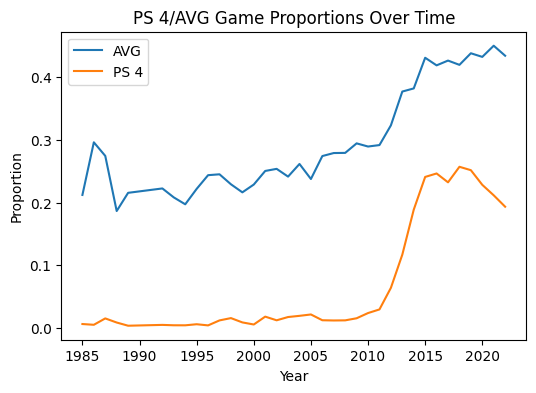

In [403]:
plt.figure(figsize=(6, 4))

plt.plot(merged_all['Release_Date'], merged_all['ad_proprtion'], label='AVG', marker='')
plt.plot(merged_all['Release_Date'], merged_all['PS4_proprtion'], label='PS 4', marker='')



plt.legend()
plt.xlabel('Year')
plt.ylabel('Proportion')
plt.title('PS 4/AVG Game Proportions Over Time')


plt.show()

In [68]:

corr, p_value = spearmanr(sample_ad, sample_ps4)

print(f"Spearman Rank Correlation: {corr}")
print(f"P-value: {p_value}")


alpha = 0.05
if p_value < alpha:
    print("Significant monotonic relationship")
else:
    print("No significant monotonic relationship")

Spearman Rank Correlation: 0.833976833976834
P-value: 2.6747213834802124e-10
Significant monotonic relationship
